## Single input neuron

In [8]:
import tensorflow as tf

X = tf.constant(0.5)
Y = tf.constant(0.0)
W = tf.Variable(1.0)

with tf.GradientTape() as tape:
    predict_Y = tf.multiply(X, W)
    cost = tf.pow(Y - predict_Y, 2)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.025)

grads = tape.gradient(cost, [W])
optimizer.apply_gradients(zip(grads, [W]))

summary_writer = tf.summary.create_file_writer('single_input_neuron')

with summary_writer.as_default():
    tf.summary.scalar('X', X, step=0)
    tf.summary.scalar('W', W, step=0)
    tf.summary.scalar('Y', Y, step=0)
    tf.summary.scalar('Predicted_Y', predict_Y, step=0)
    tf.summary.scalar('Cost', cost, step=0)

for i in range(100):
    with tf.GradientTape() as tape:
        predict_Y = tf.multiply(X, W)
        cost = tf.pow(Y - predict_Y, 2)

    grads = tape.gradient(cost, [W])
    optimizer.apply_gradients(zip(grads, [W]))

    with summary_writer.as_default():
        tf.summary.scalar('X', X, step=i+1)
        tf.summary.scalar('W', W, step=i+1)
        tf.summary.scalar('Y', Y, step=i+1)
        tf.summary.scalar('Predicted_Y', predict_Y, step=i+1)
        tf.summary.scalar('Cost', cost, step=i+1)

In [13]:
import tensorflow as tf

X_data = tf.constant([[0.4, 0.3], [0.6, 0.8], [0.7, 0.5], [0.9, 0.2]], name="input_value")
Y_data = tf.constant([[1.0], [1.0], [1.0], [0.0]], name="output_value")

X = tf.transpose(X_data)
Y = tf.transpose(Y_data)

W = tf.Variable(initial_value=tf.zeros([1, X.shape[0]], dtype=tf.float32), name="weight")
b = tf.Variable(initial_value=tf.zeros([1, 1], dtype=tf.float32))

optimizer = tf.optimizers.SGD(learning_rate=0.1)

for i in range(1000):
    with tf.GradientTape() as tape:
        Z = tf.matmul(W, X) + b
        cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z, labels=Y))
    
    gradients = tape.gradient(cost, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if i % 100 == 0:
        print("Cost after %d epoch:" % i)
        print(cost.numpy())

print("Final weights (W):", W.numpy())
print("Final bias (b):", b.numpy())

Cost after 0 epoch:
0.6931472
Cost after 100 epoch:
0.5020586
Cost after 200 epoch:
0.44484395
Cost after 300 epoch:
0.39791155
Cost after 400 epoch:
0.35904568
Cost after 500 epoch:
0.32654807
Cost after 600 epoch:
0.29909474
Cost after 700 epoch:
0.27566692
Cost after 800 epoch:
0.2554823
Cost after 900 epoch:
0.23793726
Final weights (W): [[-3.439066  4.401683]]
Final bias (b): [[1.6577408]]


## Neural Network

In [15]:
from sklearn import datasets
import numpy as np

X_data = np.array([[0.4,0.3],[0.6,0.8],[0.7,0.5],[0.9,0.2]])
Y_data = np.array([[1],[1],[1],[0]])

X = X_data.T
Y = Y_data.T

W = np.zeros((X.shape[0], 1))
b = 0

num_samples = float(X.shape[1])
for i in range(1000):
    Z = np.dot(W.T,X) + b
    pred_y = 1/(1 + np.exp(-Z))
    if(i%100 == 0):
        print("cost after %d epoch:"%i)
        print (-1/num_samples *np.sum(Y*np.log(pred_y) + (1-Y)*(np.log(1-pred_y))))
    dW = (np.dot(X,(pred_y-Y).T))/num_samples
    db = np.sum(pred_y-Y)/num_samples
    W = W - (0.1 * dW)
    b = b - (0.1 * db)

print (W,b)

cost after 0 epoch:
0.6931471805599453
cost after 100 epoch:
0.5020586179991661
cost after 200 epoch:
0.4448439151612328
cost after 300 epoch:
0.3979115275585397
cost after 400 epoch:
0.3590456846967789
cost after 500 epoch:
0.32654805177827606
cost after 600 epoch:
0.2990946818904699
cost after 700 epoch:
0.27566689061159727
cost after 800 epoch:
0.25548229634006936
cost after 900 epoch:
0.2379373586492477
[[-3.43906374]
 [ 4.4016814 ]] 1.6577403314904982


## Simple Neural Network

In [16]:
from sklearn import datasets
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

def normalize(train_data, test_data):
    col_max = np.max(train_data, axis=0)
    col_min = np.min(train_data, axis=0)
    normalized_train = np.divide(train_data - col_min, col_max - col_min)
    normalized_test = np.divide(test_data - col_min, col_max - col_min)
    return normalized_train, normalized_test

def model(X, Y):
    num_samples = float(X.shape[1])
    W = np.zeros((X.shape[0], 1))
    b = 0
    for i in range(4000):
        Z = np.dot(W.T, X) + b
        A = 1 / (1 + np.exp(-Z))
        if i % 100 == 0:
            mse_loss = -1/num_samples * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
            print("Cost after %d epoch:" % i)
            print(mse_loss)
        dW = (np.dot(X, (A - Y).T)) / num_samples
        db = np.sum(A - Y) / num_samples
        W = W - (0.75 * dW)
        b = b - (0.75 * db)
    return W, b

def predict(X, W, b, threshold=0.5):
    Z = np.dot(W.T, X) + b
    predictions = 1 / (1 + np.exp(-Z))
    return (predictions > threshold).astype(int)

(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=25)

X_train, X_test = normalize(X_train, X_test)

X_train = X_train.T
y_train = y_train.reshape(1, -1)

X_test = X_test.T
y_test = y_test.reshape(1, -1)

Weights, bias = model(X_train, y_train)

y_predictions_train = predict(X_train, Weights, bias)
accuracy_train = 100 - np.mean(np.abs(y_predictions_train - y_train)) * 100
print("Accuracy for training data: {}%".format(accuracy_train))

y_predictions_test = predict(X_test, Weights, bias)
accuracy_test = 100 - np.mean(np.abs(y_predictions_test - y_test)) * 100
print("Accuracy for test data: {}%".format(accuracy_test))

Cost after 0 epoch:
0.6931471805599453
Cost after 100 epoch:
0.24382767353051085
Cost after 200 epoch:
0.18414919195134818
Cost after 300 epoch:
0.1565873493485997
Cost after 400 epoch:
0.1396752246321806
Cost after 500 epoch:
0.1278729526958286
Cost after 600 epoch:
0.11900887751136768
Cost after 700 epoch:
0.11202667072700775
Cost after 800 epoch:
0.10633924623930974
Cost after 900 epoch:
0.1015893366124184
Cost after 1000 epoch:
0.09754476494426204
Cost after 1100 epoch:
0.09404694336475469
Cost after 1200 epoch:
0.09098323338346236
Cost after 1300 epoch:
0.08827107206470108
Cost after 1400 epoch:
0.08584834873491791
Cost after 1500 epoch:
0.08366730760137953
Cost after 1600 epoch:
0.08169053991796828
Cost after 1700 epoch:
0.07988826663984763
Cost after 1800 epoch:
0.0782364464730404
Cost after 1900 epoch:
0.07671542796224082
Cost after 2000 epoch:
0.07530896965280097
Cost after 2100 epoch:
0.07400351504064748
Cost after 2200 epoch:
0.07278764749502992
Cost after 2300 epoch:
0.0716

## Shallow Neural Network

Instructions for updating:
non-resource variables are not supported in the long term


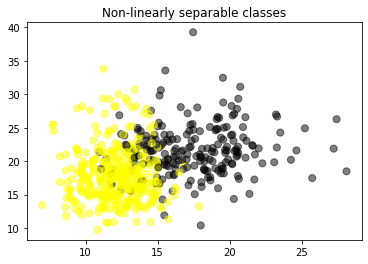

Cost after 0 epoch:
0.69310343
Cost after 1000 epoch:
0.66238487
Cost after 2000 epoch:
0.65914184
Cost after 3000 epoch:
0.6527386
Cost after 4000 epoch:
0.63978124
Accuracy for training data: 0.6197183
Accuracy for test data: 0.6503497


<Figure size 432x288 with 0 Axes>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tf.disable_v2_behavior()

def normalize(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

(x_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

cmap = ListedColormap(['black', 'yellow'])
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(x_cancer[:, 0], x_cancer[:, 1], c=y_cancer, marker='o', s=50, cmap=cmap, alpha=0.5)
plt.show()
plt.savefig('fig1.png', bbox_inches='tight')

x_train, x_test, y_train, y_test = train_test_split(x_cancer, y_cancer, random_state=25)

x_train = normalize(x_train).T
y_train = y_train.reshape(1, -1)

x_test = normalize(x_test).T
y_test = y_test.reshape(1, -1)

x = tf.compat.v1.placeholder(dtype=tf.float32, shape=[x_train.shape[0], None])
y = tf.compat.v1.placeholder(dtype=tf.float32, shape=[1, None])

w1 = tf.Variable(initial_value=tf.random_normal([8, x_train.shape[0]], dtype=tf.float32) * 0.01)
b1 = tf.Variable(initial_value=tf.zeros([8, 1], dtype=tf.float32))
w2 = tf.Variable(initial_value=tf.random_normal([1, 8], dtype=tf.float32) * 0.01)
b2 = tf.Variable(initial_value=tf.zeros([1, 1], dtype=tf.float32))

z1 = tf.matmul(w1, x) + b1
a1 = tf.sigmoid(z1)
z2 = tf.matmul(w2, a1) + b2

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z2, labels=y))

gd = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        _, c = sess.run([gd, cost], feed_dict={x: x_train, y: y_train})
        if i % 1000 == 0:
            print("Cost after %d epoch:" % i)
            print(c)
    correct_prediction = tf.equal(tf.round(tf.sigmoid(z2)), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy for training data:", accuracy.eval({x: x_train, y: y_train}))
    print("Accuracy for test data:", accuracy.eval({x: x_test, y: y_test}))

## Deep Neural Network

In [23]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

def normalize(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_cancer, y_cancer, random_state=25)

X_train = normalize(X_train).T
Y_train = Y_train.reshape(1, -1)

X_test = normalize(X_test).T
Y_test = Y_test.reshape(1, -1)

X = tf.compat.v1.placeholder(dtype=tf.float64, shape=[X_train.shape[0], None])
Y = tf.compat.v1.placeholder(dtype=tf.float64, shape=[1, None])

layer_dims = [X_train.shape[0], 8, 8, 1]
parameters = {}
for i in range(1, len(layer_dims)):
    parameters['W' + str(i)] = tf.Variable(initial_value=tf.random.normal([layer_dims[i], layer_dims[i-1]], dtype=tf.float64) * 0.01)
    parameters['b' + str(i)] = tf.Variable(initial_value=tf.zeros([layer_dims[i], 1], dtype=tf.float64) * 0.01)

A = X
L = int(len(parameters) / 2)
for i in range(1, L):
    A_prev = A
    Z = tf.add(tf.matmul(parameters['W' + str(i)], A_prev), parameters['b' + str(i)])
    A = tf.nn.relu(Z)
Z_final = tf.add(tf.matmul(parameters['W' + str(L)], A), parameters['b' + str(L)])

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final, labels=Y))

GD = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(cost)

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    for i in range(5000):
        c = sess.run([GD, cost], feed_dict={X: X_train, Y: Y_train})[1]
        if i % 1000 == 0:
            print("cost after %d epoch:" % i)
            print(c)
    correct_prediction = tf.equal(tf.round(tf.sigmoid(Z_final)), Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy for training data:", accuracy.eval({X: X_train, Y: Y_train}))
    print("Accuracy for test data:", accuracy.eval({X: X_test, Y: Y_test}))

cost after 0 epoch:
0.6931472726175256
cost after 1000 epoch:
0.6641977067928331
cost after 2000 epoch:
0.664075059371534
cost after 3000 epoch:
0.061329205818325794
cost after 4000 epoch:
0.035426462455188316
Accuracy for training data: 0.9906103
Accuracy for test data: 0.91608393


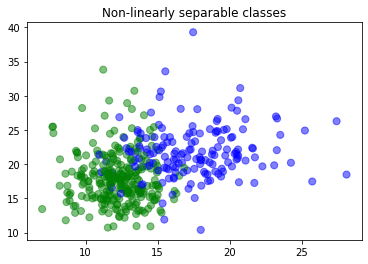

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
0.8458931781814497
0.6932491236171826
0.5258648749611917
0.4559988643179845
0.43387342606841994
0.4210911796879801
0.4114248654636929
0.40365231845189253
0.39732223517462
0.39214210411844863


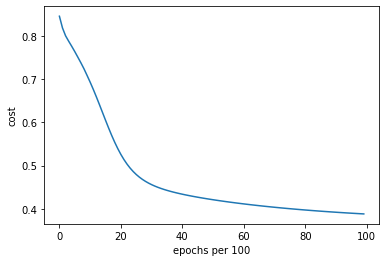

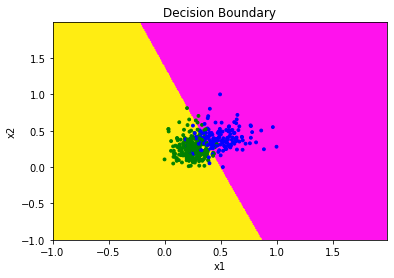

ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3798, in _create_op_internal
    ret = Operation(
  File "C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 2183, in variable_v2
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 70, in variable_op_v2
    return gen_state_ops.variable_v2(
  File "C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 1817, in _init_from_args
    self._variable = state_ops.variable_op_v2(


In [30]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors

def normalize(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return (data - col_min) / (col_max - col_min)

(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X_cancer, y_cancer, random_state=25)

X_train = X_train[:, :2]

colors = ['blue', 'green']
cmap = matplotlib.colors.ListedColormap(colors)
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, marker='o', s=50, cmap=cmap, alpha=0.5)
plt.show()

def forwardProp(X, parameters, drop_out=False):
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        Z = tf.add(tf.matmul(parameters['W' + str(l)], A_prev), parameters['b' + str(l)])
        A = tf.nn.relu(Z)
        if drop_out == True:
            A = tf.nn.dropout(x=A, rate=0.8)
    A = tf.add(tf.matmul(parameters['W' + str(L)], A), parameters['b' + str(L)])
    return A

def deep_net(regularization=False, lambd=0, drop_out=False, optimizer=None):
    layer_dims = [2, 25, 25, 1]
    X = tf.compat.v1.placeholder(dtype=tf.float64, shape=[layer_dims[0], None])
    Y = tf.compat.v1.placeholder(dtype=tf.float64, shape=[1, None])

    tf.random.set_seed(1)
    parameters = {}
    for i in range(1, len(layer_dims)):
        parameters['W' + str(i)] = tf.Variable(tf.compat.v1.get_variable("W" + str(i), shape=[layer_dims[i], layer_dims[i - 1]],
                                                  initializer=tf.compat.v1.initializers.glorot_uniform(),
                                                  dtype=tf.float64))
        parameters['b' + str(i)] = tf.Variable(tf.compat.v1.get_variable("b" + str(i), initializer=tf.zeros([layer_dims[i], 1],
                                                                                      dtype=tf.float64)))

    Z_final = forwardProp(X, parameters, drop_out)

    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final, labels=Y)
    if regularization:
        reg_term = 0
        L = len(parameters) // 2
        for l in range(1, L + 1):
            reg_term += tf.nn.l2_loss(parameters['W' + str(l)])
        cost = cost + (lambd / 2) * reg_term
    cost = tf.reduce_mean(cost)

    if optimizer == "momentum":
        train_net = tf.compat.v1.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9).minimize(cost)
    elif optimizer == "rmsProp":
        train_net = tf.compat.v1.train.RMSPropOptimizer(learning_rate=0.01, decay=0.999, epsilon=1e-10).minimize(cost)
    elif optimizer == "adam":
        train_net = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01, beta1=0.9, beta2=0.999).minimize(cost)
    else:
        train_net = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    init = tf.compat.v1.global_variables_initializer()
    costs = []
    with tf.compat.v1.Session() as sess:
        sess.run(init)
        for i in range(10000):
            _, c = sess.run([train_net, cost], feed_dict={X: normalize(X_train).T, Y: Y_train.reshape(1, -1)})
            if i % 100 == 0:
                costs.append(c)
            if i % 1000 == 0:
                print(c)
        plt.plot(costs)
        plt.xlabel("epochs per 100")
        plt.ylabel("cost")
        plt.show()
        params = sess.run(parameters)
    return params

def predict(X, parameters):
    with tf.compat.v1.Session() as sess:
        Z = forwardProp(X, parameters, drop_out=False)
        A = sess.run(tf.round(tf.sigmoid(Z)))
    return A

def plot_decision_boundary1(X, y, model):
    plt.clf()
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    colors = ['blue', 'green']
    cmap = matplotlib.colors.ListedColormap(colors)
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    A = model(np.c_[xx.ravel(), yy.ravel()].T)
    A = A.reshape(xx.shape)
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8, cmap=cmap)
    plt.title("Decision Boundary")
    plt.show()

p = deep_net(regularization=True, lambd=0.02)
plot_decision_boundary1(normalize(X_train).T, Y_train, lambda x: predict(x, p))

p = deep_net(drop_out=True)
p = deep_net(optimizer="momentum")
p = deep_net(optimizer="rmsProp")
p = deep_net(optimizer="adam")